In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def visualize_transaction_amounts(df1, df2, df3):
    """
    Creates visualizations to analyze transaction amounts in relation to labels (suspicious vs non-suspicious)
    across the three datasets.
    """
    fig = plt.figure(figsize=(15, 10))
    
    # 1. Box plots for amount distribution
    plt.subplot(2, 1, 1)
    data_suspicious = [
        df[df['Label'] == 1]['USD_amount'].values
        for df in [df1, df2, df3]
    ]
    data_non_suspicious = [
        df[df['Label'] == 0]['USD_amount'].values
        for df in [df1, df2, df3]
    ]
    
    positions = np.arange(3)
    width = 0.35
    
    bp1 = plt.boxplot(data_suspicious, positions=positions-width/2, 
                     patch_artist=True, boxprops=dict(facecolor='#ff9999'))
    bp2 = plt.boxplot(data_non_suspicious, positions=positions+width/2, 
                     patch_artist=True, boxprops=dict(facecolor='#99ff99'))
    
    plt.xticks(positions, ['Dataset 1', 'Dataset 2', 'Dataset 3'])
    plt.title('Transaction Amount Distribution by Label')
    plt.ylabel('Amount (USD)')
    plt.legend([bp1["boxes"][0], bp2["boxes"][0]], 
              ['Suspicious', 'Non-suspicious'], 
              loc='upper right')
    
    # 2. Violin plots for detailed distribution
    plt.subplot(2, 1, 2)
    
    # Combine datasets with labels
    for i, df in enumerate([df1, df2, df3]):
        # Suspicious transactions
        suspicious = df[df['Label'] == 1]['USD_amount']
        non_suspicious = df[df['Label'] == 0]['USD_amount']
        
        # Convert to log scale
        if len(suspicious) > 0:
            suspicious_log = np.log10(suspicious + 1)
            plt.violinplot(suspicious_log, positions=[i-width/2], showmeans=True, color='#ff9999')
        
        if len(non_suspicious) > 0:
            non_suspicious_log = np.log10(non_suspicious + 1)
            plt.violinplot(non_suspicious_log, positions=[i+width/2], showmeans=True, color='#99ff99')
    
    plt.xticks(positions, ['Dataset 1', 'Dataset 2', 'Dataset 3'])
    plt.title('Transaction Amount Distribution (Log Scale)')
    plt.ylabel('Log10(Amount USD + 1)')
    
    # Add legend for violin plots
    from matplotlib.patches import Patch
    plt.legend([Patch(color='#ff9999'), Patch(color='#99ff99')],
              ['Suspicious', 'Non-suspicious'],
              loc='upper right')
    
    plt.tight_layout()
    plt.show()

In [2]:
ds1 = pd.read_parquet('../data/jp_morgan/sorted/transaction_metrics_final_aml_v5_cbflag_mod_metrics.parquet')
ds2 = pd.read_parquet('../data/jp_morgan/sorted/transaction_metrics_final_fraud_v5_cbflag_mod_metrics.parquet')
ds3 = pd.read_parquet('../data/jp_morgan/sorted/transaction_metrics_final_ds3_v5_cbflag_mod_metric.parquet')

NameError: name 'suspicious_color' is not defined

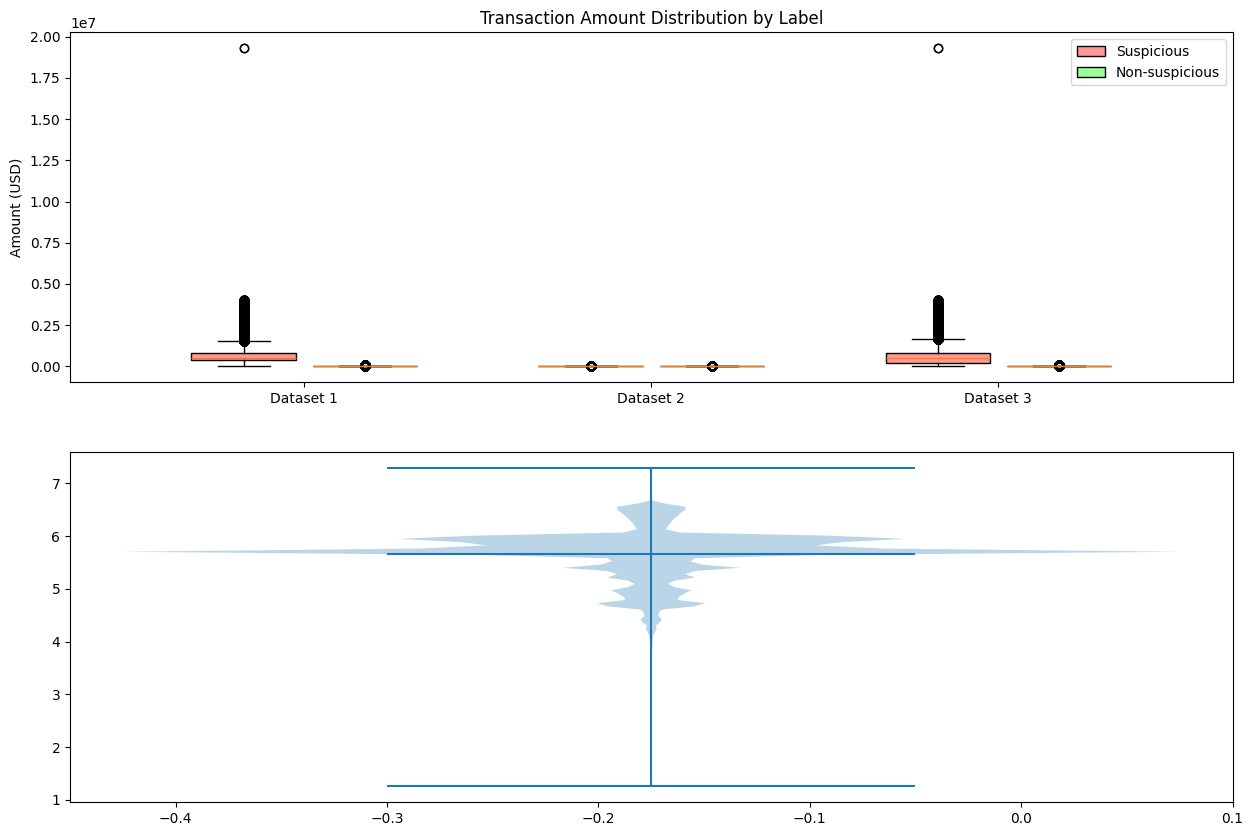

In [ ]:
visualize_transaction_amounts(ds1, ds2, ds3)